Model R² Score: 0.97


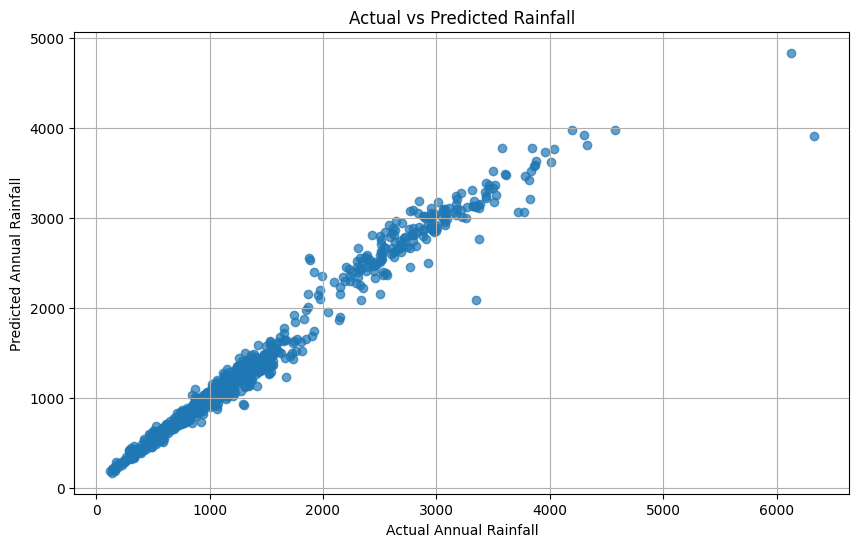

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Step 2: Load Data
data = pd.read_csv('/Users/tharun/Downloads/PROJECTS/New/proof/PLACEMENT MATERIAL/DICV/Step/rainfall in india 1901-2015.csv')

# Step 3: Preprocessing
# Let's predict the Annual Rainfall based on monthly rainfall
# Drop rows with missing values
data.dropna(inplace=True)

# Features: Monthly Rainfall
X = data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
# Target: Annual Rainfall
y = data['ANNUAL']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate Model
score = model.score(X_test, y_test)
print(f"Model R² Score: {score:.2f}")

# Step 7: Predict (Example)
predictions = model.predict(X_test)

# Step 8: Plot Real vs Predicted
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions, alpha=0.7)
plt.xlabel('Actual Annual Rainfall')
plt.ylabel('Predicted Annual Rainfall')
plt.title('Actual vs Predicted Rainfall')
plt.grid(True)
plt.show()

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import joblib

# Load data
data = pd.read_csv('/Users/tharun/Downloads/PROJECTS/New/proof/PLACEMENT MATERIAL/DICV/Step/rainfall in india 1901-2015.csv')
data.dropna(inplace=True)

# Encode the region (SUBDIVISION)
le = LabelEncoder()
data['SUBDIVISION_ENC'] = le.fit_transform(data['SUBDIVISION'])

# Features: Region + Other Months (optional, you can customize)
X = data[['SUBDIVISION_ENC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN']]
y = data['JUL']  # Target: July Rainfall (or switch to 'AUG'/'MONSOON_TOTAL')

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save model and encoder
joblib.dump(model, '/Users/tharun/Downloads/july_rainfall_model.pkl')
joblib.dump(le, '/Users/tharun/Downloads/region_encoder.pkl')

['/Users/tharun/Downloads/region_encoder.pkl']

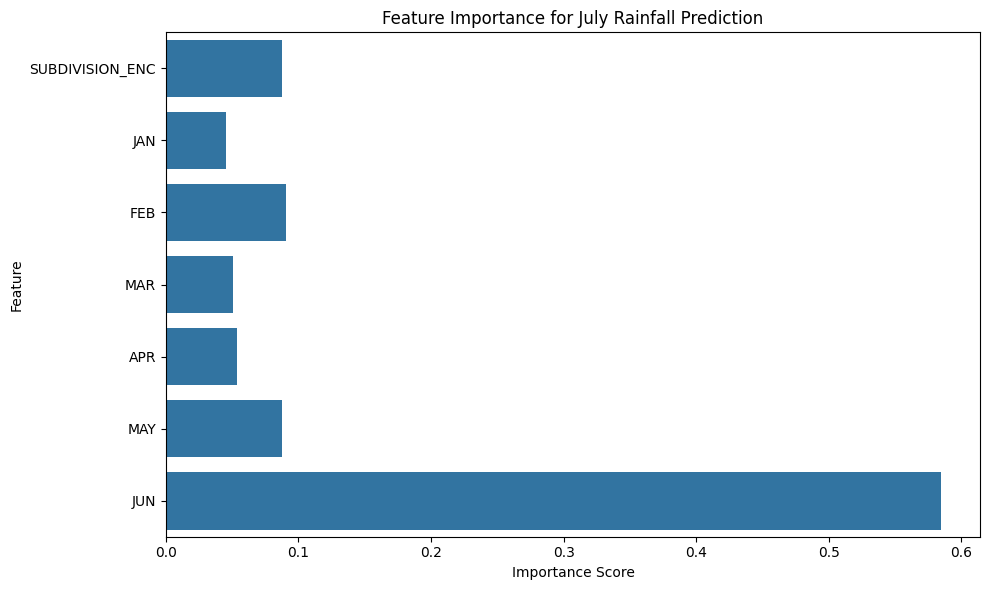

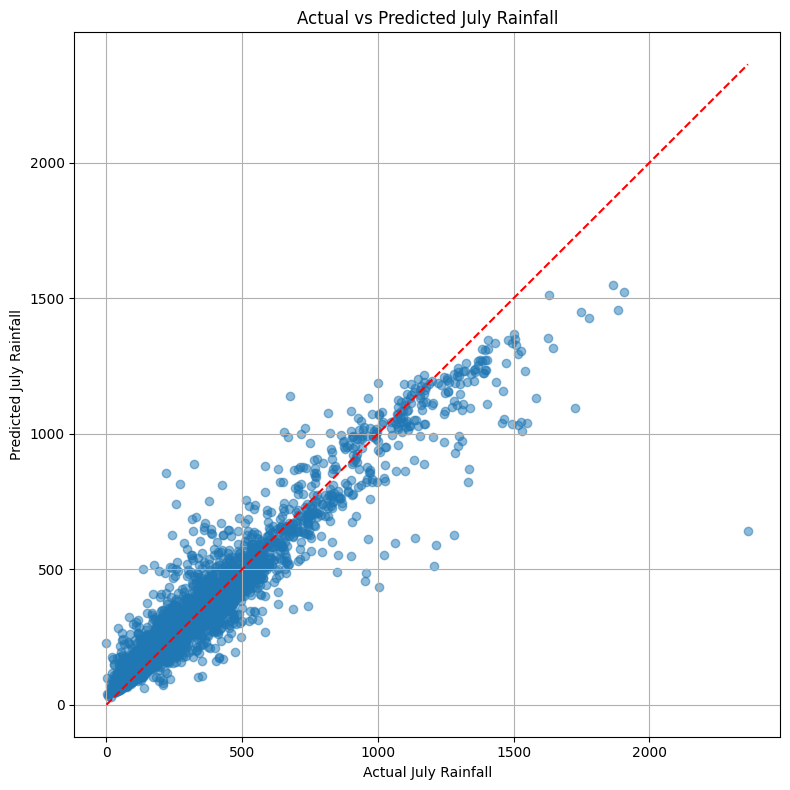

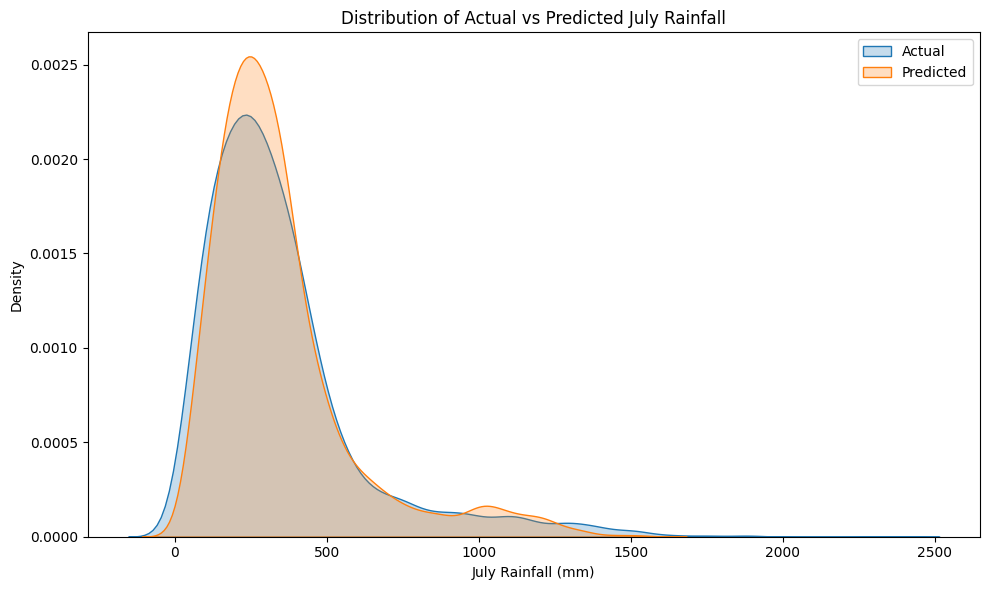

Mean Squared Error (MSE): 7490.23
R2 Score: 0.90


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Load the trained model and encoder
model = joblib.load('/Users/tharun/Downloads/july_rainfall_model.pkl')
le = joblib.load('/Users/tharun/Downloads/region_encoder.pkl')

# Load the original dataset again
data = pd.read_csv('/Users/tharun/Downloads/PROJECTS/New/proof/PLACEMENT MATERIAL/DICV/Step/rainfall in india 1901-2015.csv')
data.dropna(inplace=True)
data['SUBDIVISION_ENC'] = le.transform(data['SUBDIVISION'])

# Prepare features and target again
X = data[['SUBDIVISION_ENC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN']]
y = data['JUL']

# Predict
y_pred = model.predict(X)

# Plot 1: Feature Importance
plt.figure(figsize=(10, 6))
importance = model.feature_importances_
features = X.columns
sns.barplot(x=importance, y=features)
plt.title('Feature Importance for July Rainfall Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Plot 2: Predicted vs Actual
plt.figure(figsize=(8, 8))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.xlabel('Actual July Rainfall')
plt.ylabel('Predicted July Rainfall')
plt.title('Actual vs Predicted July Rainfall')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 3: Distribution of Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.kdeplot(y, label='Actual', fill=True)
sns.kdeplot(y_pred, label='Predicted', fill=True)
plt.title('Distribution of Actual vs Predicted July Rainfall')
plt.xlabel('July Rainfall (mm)')
plt.legend()
plt.tight_layout()
plt.show()

# Metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score: {r2:.2f}")